<a href="https://colab.research.google.com/github/azal17/encoder/blob/main/dm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter Sampling Frequency:
5
Enter Signal Duration:
5
Enter message_frequency_cosine:300
Enter message_frequency_sine:100
Enter message_amplitude_cosine:10
Enter message_amplitude_sine:10
Enter the nyquist_rate: 4
Enter the value of delta epsilon: 0.2


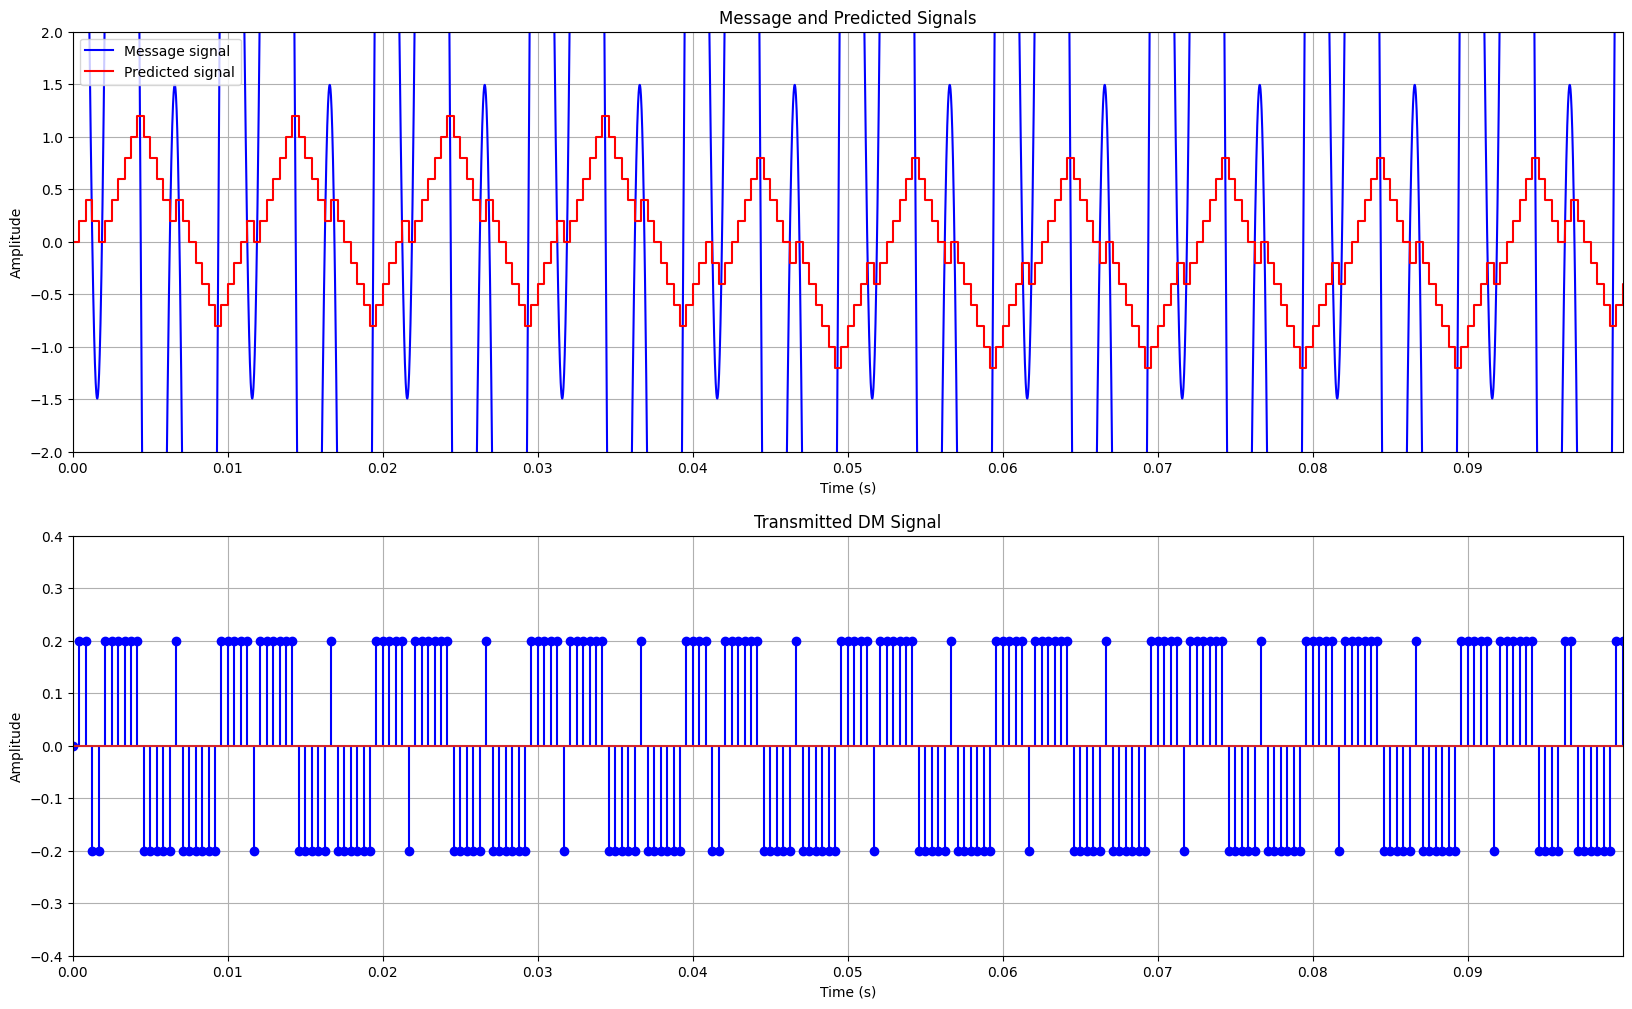

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


sampling_frequency =pow(10,float(input("Enter Sampling Frequency:\n")))
signal_duration =float(input("Enter Signal Duration:\n"))
time = np.arange(signal_duration * sampling_frequency) / sampling_frequency


message_frequency_cosine =float(input("Enter message_frequency_cosine:"))
message_frequency_sine =float(input("Enter message_frequency_sine:"))
message_amplitude_cosine =float(input("Enter message_amplitude_cosine:"))
message_amplitude_sine =float(input("Enter message_amplitude_sine:"))


message_cosine = message_amplitude_cosine * np.cos(2 * np.pi * message_frequency_cosine * time)
message_sine = message_amplitude_sine * np.sin(2 * np.pi * message_frequency_sine * time)
message = message_cosine + message_sine


bandwidth = max(message_frequency_cosine, message_frequency_sine)


nyquist_rate =float(input("Enter the nyquist_rate: "))
delta_sampling_frequency = nyquist_rate * 2 * bandwidth

delta_epsilon =float(input("Enter the value of delta epsilon: "))


delta_time = np.arange(signal_duration * delta_sampling_frequency) / delta_sampling_frequency


sampled_message_cosine = message_amplitude_cosine * np.cos(2 * np.pi * message_frequency_cosine * delta_time)
sampled_message_sine = message_amplitude_sine * np.sin(2 * np.pi * message_frequency_sine * delta_time)
sampled_message = sampled_message_cosine + sampled_message_sine


prediction = np.zeros((len(sampled_message),))
modulated = np.zeros_like(prediction)


for i, s_amplitude in enumerate(sampled_message[1:]):
    amplitude_diff = s_amplitude - prediction[i]
    modulated[i + 1] = (2 * float(amplitude_diff > 0) - 1) * delta_epsilon
    prediction[i + 1] = prediction[i] + modulated[i + 1]


output = [1] + [float(modulated[i] > 0) for i in range(1, len(modulated))]

plt.figure(figsize=(20, 12))
plot_time = 0.1


plt.subplot(2, 1, 1)
plt.plot(time, message, 'b')
plt.step(delta_time, prediction, 'r', where='post')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Message and Predicted Signals')
plt.legend(['Message signal', 'Predicted signal'])
plt.axis([0, plot_time, -2, 2])
plt.xticks(np.arange(0, plot_time, plot_time/10))
plt.grid()


plt.subplot(2, 1, 2)
plt.stem(delta_time, modulated, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Transmitted DM Signal')
plt.axis([0, plot_time, -2 * delta_epsilon, 2 * delta_epsilon])
plt.xticks(np.arange(0, plot_time, plot_time/10))
plt.grid()

plt.show()